In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.signal import spectrogram
from skimage.feature import canny
from skimage.transform import hough_line, hough_line_peaks

In [2]:
data = pd.read_csv("C://Users//Hp//Documents//Section 1 and 3 data//Section 3 data.csv")
data.head(5)

,3.356726646,3.4246883392333984,3.315129280090332,2.866584539413452,3.2591633796691895,3.063363790512085,3.02205228805542,3.709723949432373,3.0598325729370117,2.890528678894043,...,3.2995495796203613,3.197462558746338,3.1719608306884766,3.526296615600586,3.013812303543091,3.373962879180908,3.448312759399414,3.622835636138916,3.211477041244507,3.4222567081451416
0,3.264011,3.331538,3.254502,2.816155,3.175651,2.995944,2.963060,3.618391,3.015709,2.849339,...,3.220985,3.110368,3.108212,3.489397,2.960912,3.306820,3.417709,3.524081,3.141618,3.361223
1,3.170393,3.238018,3.185075,2.759907,3.089149,2.929650,2.906405,3.522798,2.967472,2.804227,...,3.139422,3.024213,3.043078,3.437473,2.904058,3.234052,3.370602,3.421170,3.069848,3.288135
2,3.073419,3.143099,3.082911,2.682017,2.991492,2.867536,2.858474,3.411356,2.903908,2.744555,...,3.046735,2.941585,2.972789,3.329692,2.832499,3.140333,3.262105,3.302803,2.990968,3.170215
3,2.976448,3.048187,2.980743,2.604133,2.893835,2.805416,2.810538,3.299923,2.840350,2.684883,...,2.954042,2.858966,2.902495,3.221916,2.760934,3.046621,3.153600,3.184436,2.912082,3.052295
4,2.879478,2.953276,2.878582,2.526245,2.796179,2.743304,2.762607,3.188490,2.776787,2.625209,...,2.861355,2.776344,2.832206,3.114133,2.689374,2.952907,3.045095,3.066068,2.833202,2.934375


In [3]:
df = data.copy()

In [4]:
df.columns = range(1, len(df.columns) + 1)
df

,1,2,3,4,5,6,7,8,9,10,...,52,53,54,55,56,57,58,59,60,61
0,3.264011,3.331538,3.254502,2.816155,3.175651,2.995944,2.963060,3.618391,3.015709,2.849339,...,3.220985,3.110368,3.108212,3.489397,2.960912,3.306820,3.417709,3.524081,3.141618,3.361223
1,3.170393,3.238018,3.185075,2.759907,3.089149,2.929650,2.906405,3.522798,2.967472,2.804227,...,3.139422,3.024213,3.043078,3.437473,2.904058,3.234052,3.370602,3.421170,3.069848,3.288135
2,3.073419,3.143099,3.082911,2.682017,2.991492,2.867536,2.858474,3.411356,2.903908,2.744555,...,3.046735,2.941585,2.972789,3.329692,2.832499,3.140333,3.262105,3.302803,2.990968,3.170215
3,2.976448,3.048187,2.980743,2.604133,2.893835,2.805416,2.810538,3.299923,2.840350,2.684883,...,2.954042,2.858966,2.902495,3.221916,2.760934,3.046621,3.153600,3.184436,2.912082,3.052295
4,2.879478,2.953276,2.878582,2.526245,2.796179,2.743304,2.762607,3.188490,2.776787,2.625209,...,2.861355,2.776344,2.832206,3.114133,2.689374,2.952907,3.045095,3.066068,2.833202,2.934375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4648,1.718687,1.780328,1.364540,1.291920,1.060938,0.951350,1.969769,3.457134,1.841767,0.723321,...,10.515642,0.893715,1.753626,4.839245,1.010556,3.374171,2.850732,0.946474,0.974550,1.025981
4649,1.798417,2.215754,1.297023,1.411583,0.894733,0.861312,1.120137,2.679779,0.653337,0.705998,...,1.072754,0.684518,1.451200,1.127545,0.881538,1.310711,2.035393,0.930384,0.807320,1.109655
4650,1.364369,1.778911,0.846207,1.515962,0.898278,0.719239,0.842672,0.860480,0.623939,0.894922,...,0.783171,0.696427,1.129982,0.854248,0.942355,0.711466,0.673942,0.628565,0.616893,1.103891
4651,1.011800,1.249690,0.827500,1.465700,0.903440,0.679450,0.897110,0.897580,0.830160,1.429770,...,1.302580,3.233280,1.313440,1.293910,1.448750,1.555390,1.170550,0.686880,1.051330,1.627580


In [5]:
df.shape

(4653, 61)

In [6]:
df.isnull().sum().sum()

0

In [7]:
# Calculate descriptive statistics
mean_data = np.mean(df, axis=1)
median_data = np.median(df, axis=1)
std_data = np.std(df, axis=1)
skew_data = stats.skew(df, axis=1)
kurtosis_data = stats.kurtosis(df, axis=1)

statistics_df = pd.DataFrame({
    'Mean': mean_data,
    'Median': median_data,
    'Standard Deviation': std_data,
    'Skewness': skew_data,
    'Kurtosis': kurtosis_data
})

statistics_df

,Mean,Median,Standard Deviation,Skewness,Kurtosis
0,3.211819,3.148841,0.228137,0.688850,0.375360
1,3.141262,3.080920,0.221093,0.648095,0.402135
2,3.058638,3.009674,0.205633,0.627920,0.367840
3,2.976014,2.937785,0.190889,0.597447,0.314326
4,2.893391,2.876812,0.177038,0.553451,0.237440
...,...,...,...,...,...
4648,1.492596,1.020285,1.409379,4.569569,25.231221
4649,1.083135,0.894733,0.548233,1.592257,1.682383
4650,1.027814,0.820611,0.735688,3.334528,12.032160
4651,1.285079,1.025940,0.744751,1.775456,2.444981


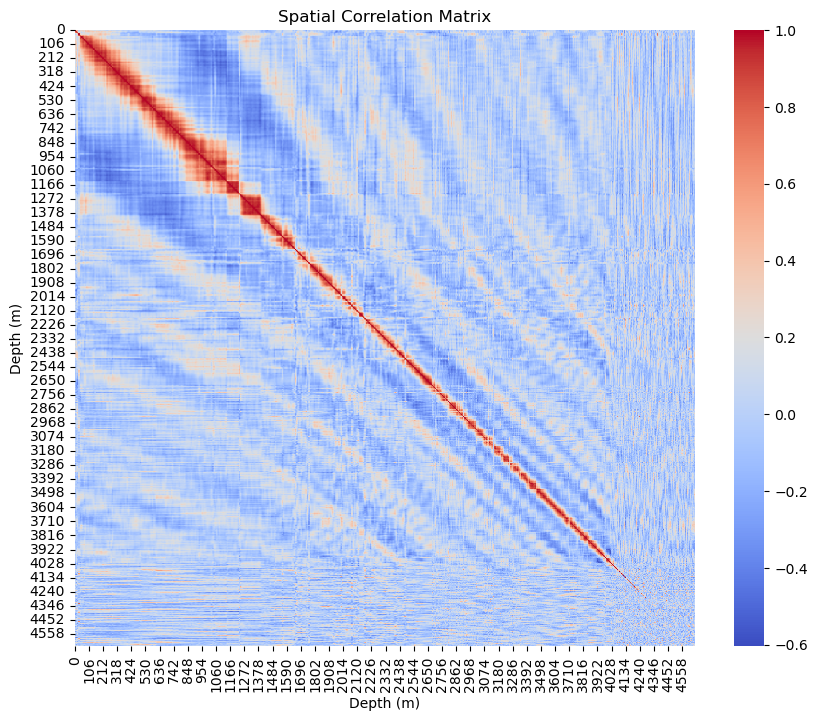

In [8]:
corr_matrix = np.corrcoef(df)
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False)
plt.title("Spatial Correlation Matrix")
plt.xlabel("Depth (m)")
plt.ylabel("Depth (m)")
plt.show()

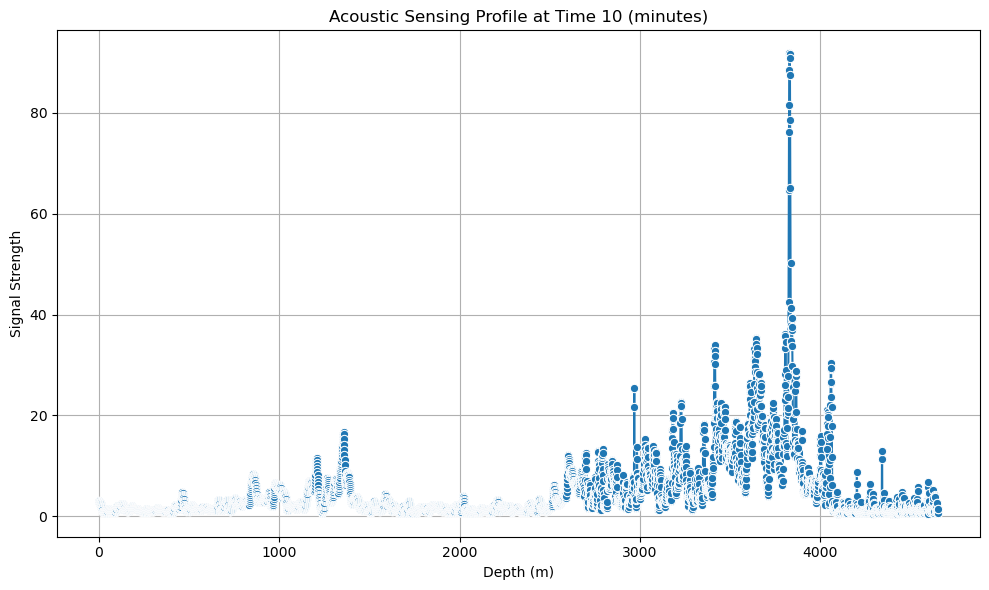

In [9]:
time_column = df.columns[10]    # in specific time (e.g.10)
df_time = df[time_column]


plt.figure(figsize=(10, 6))
sns.lineplot(x=df.index, y=df_time, marker='o')
plt.xlabel('Depth (m)')
plt.ylabel('Signal Strength')
plt.title(f'Acoustic Sensing Profile at Time 10 (minutes)')
plt.grid(True)
plt.tight_layout()
plt.show()

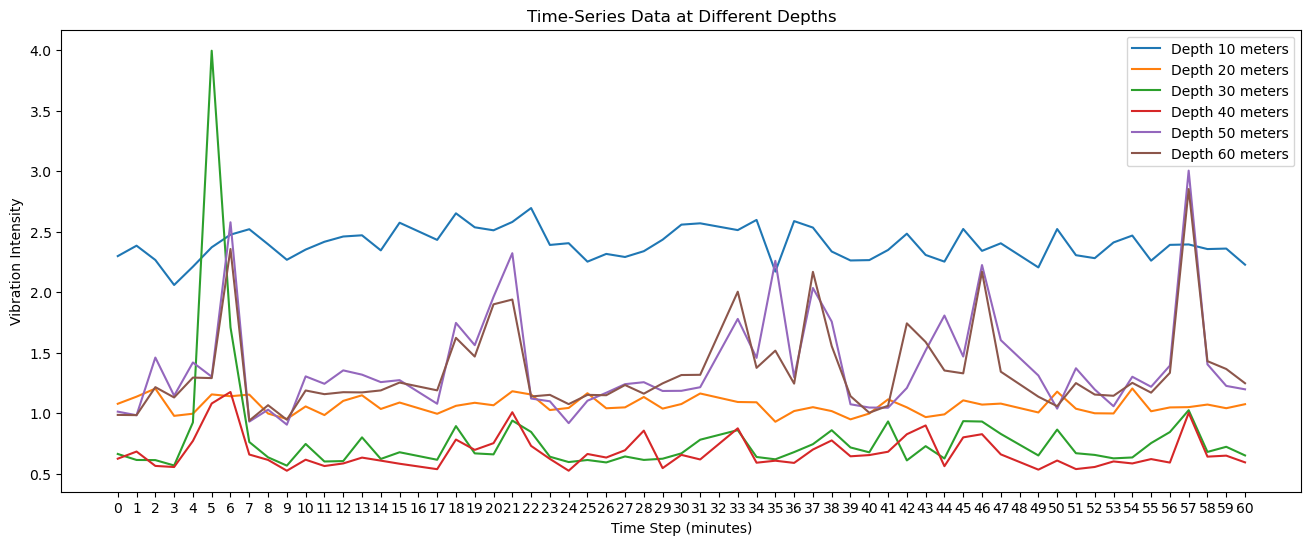

In [10]:
plt.figure(figsize=(16, 6))
plt.plot(df.iloc[10, :].values, label='Depth 10 meters')
plt.plot(df.iloc[20, :].values, label='Depth 20 meters')
plt.plot(df.iloc[30, :].values, label='Depth 30 meters')
plt.plot(df.iloc[40, :].values, label='Depth 40 meters')
plt.plot(df.iloc[50, :].values, label='Depth 50 meters')
plt.plot(df.iloc[60, :].values, label='Depth 60 meters')
plt.xticks(ticks=range(df.shape[1]))
plt.legend()
plt.title('Time-Series Data at Different Depths')
plt.xlabel('Time Step (minutes)')
plt.ylabel('Vibration Intensity')
plt.show()

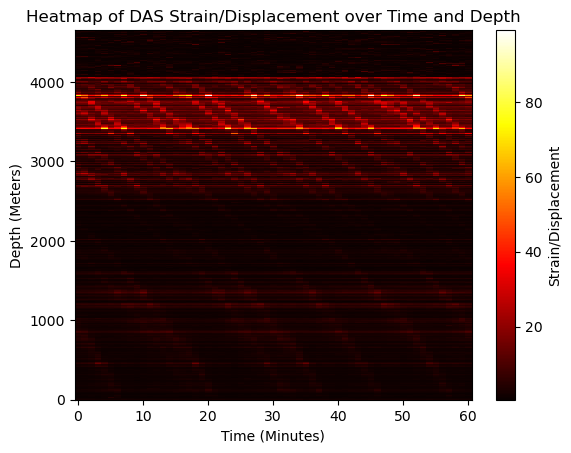

In [11]:
plt.imshow(df, aspect='auto', cmap='hot', interpolation='nearest', origin='lower')
plt.colorbar(label='Strain/Displacement')
plt.xlabel('Time (Minutes)')
plt.ylabel('Depth (Meters)')
plt.title('Heatmap of DAS Strain/Displacement over Time and Depth')
plt.show()


#### Line Detection

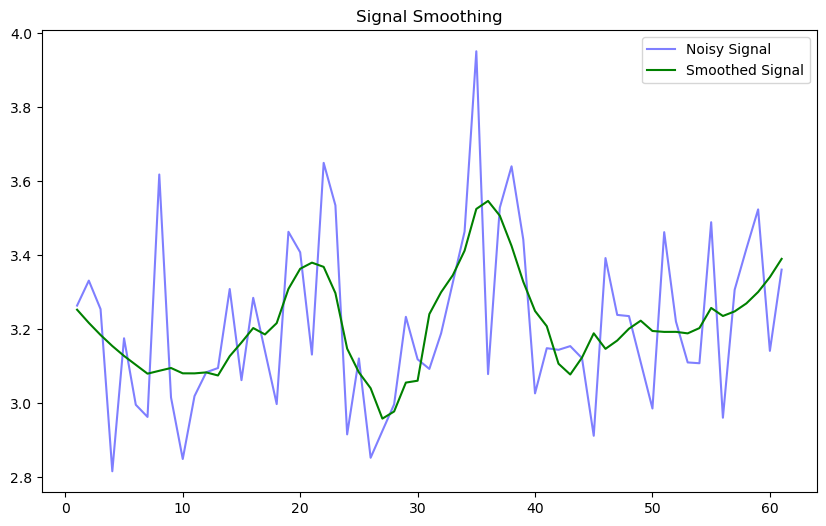

In [13]:
from scipy.signal import savgol_filter

np.random.seed(42)
time = np.linspace(1,61,61)

# Apply Savitzky-Golay Filter for Smoothing
smoothed_df = savgol_filter(df, window_length=11, polyorder=2)

# Plot Original and Smoothed Data
plt.figure(figsize=(10, 6))
plt.plot(time, df.iloc[0, :], color="blue", alpha=0.5, label="Noisy Signal")
plt.plot(time, smoothed_df[0, :], color="green", label="Smoothed Signal")
plt.legend()
plt.title("Signal Smoothing")
plt.show()

In [14]:
smoothed_df

array([[3.25293873, 3.21731469, 3.18460333, ..., 3.30082421, 3.34094695,
        3.39031625],
       [3.16179886, 3.13229264, 3.10500445, ..., 3.23044723, 3.26606544,
        3.30963614],
       [3.06135843, 3.03694681, 3.01441294, ..., 3.13048419, 3.16047683,
        3.19738999],
       ...,
       [1.54788469, 1.38544031, 1.24052844, ..., 0.79898515, 0.80746407,
        0.81968284],
       [1.21463543, 1.09165873, 0.99874409, ..., 1.19246485, 1.20652274,
        1.25728729],
       [2.28777868, 2.37778748, 2.4203816 , ..., 1.13853074, 1.16732417,
        1.24598542]])

In [15]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(smoothed_df), columns=df.columns)

X = np.array(df_scaled)
y = np.random.randint(2, size=len(data))

X = X.reshape((X.shape[0], X.shape[1], 1))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, LSTM, Dense, Dropout, Flatten


model = Sequential()

# CNN layer: 1D convolution
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=2))


# Additional CNN layers
model.add(Conv1D(filters=128, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))



# LSTM layer
model.add(LSTM(100, return_sequences=False))


model.add(Dropout(0.2))


# Dense output layer 
model.add(Dense(1, activation='relu'))  # For binary classification


# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


C:\Users\Hp\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [17]:
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.4f}")


Epoch 1/20
117/117 ━━━━━━━━━━━━━━━━━━━━ 12s 35ms/step - accuracy: 0.4883 - loss: 1.2547 - val_accuracy: 0.4683 - val_loss: 0.7031
Epoch 2/20
117/117 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.5007 - loss: 0.6994 - val_accuracy: 0.4683 - val_loss: 0.6962
Epoch 3/20
117/117 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - accuracy: 0.5138 - loss: 0.6970 - val_accuracy: 0.4683 - val_loss: 0.6980
Epoch 4/20
117/117 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.5067 - loss: 0.6998 - val_accuracy: 0.4683 - val_loss: 0.7009
Epoch 5/20
117/117 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.4883 - loss: 0.6994 - val_accuracy: 0.5338 - val_loss: 0.6911
Epoch 6/20
117/117 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - accuracy: 0.4729 - loss: 0.7023 - val_accuracy: 0.4683 - val_loss: 0.7032
Epoch 7/20
117/117 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - accuracy: 0.5057 - loss: 0.6958 - val_accuracy: 0.5338 - val_loss: 0.6914
Epoch 8/20
117/117 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - accuracy: 0.5149 - loss: 0.6948 - val_acc

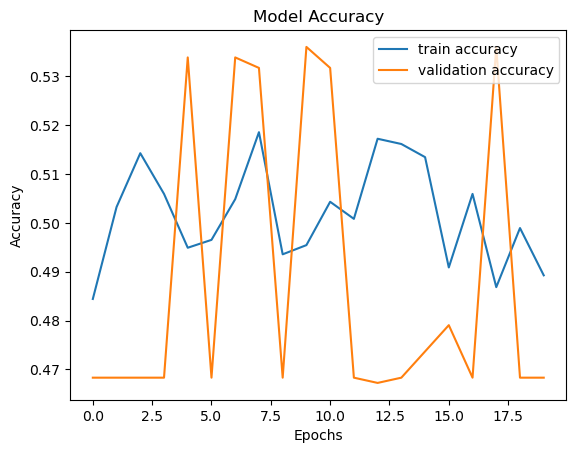

In [18]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()